In [2]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576
%matplotlib inline

In [3]:
# example 7.31, 7.32
'''Suppose a pharmaceutical company has developed a new drug for lowering blood pressure, and they
are preparing a clinical trial (experiment) to test the drug's effectiveness. They recruit people who
are taking a particular standard blood pressure medication. People in the control group will continue
to take their current medication through generic-looking pills to ensure blinding. Write down the
hypotheses for a two-sided hypothesis test in this context.'''
'''The researchers would like to run the clinical trial on patients with systolic blood pressures between
140 and 180 mmHg. Suppose previously published studies suggest that the standard deviation of the
patients' blood pressures will be about 12 mmHg and the distribution of patient blood pressures will
be approximately symmetric.26 If we had 100 patients per group, what would be the approximate
standard error for xbar_trmt xbar_ctrl?'''
print('''a)
H0: the new drug performs exactly as well as the standard medication (u_trtmnt - u_ctrl = 0)
HA: the new drug's performance differs from the standard medication (u_trtmnt - u_ctrl != 0)''')
n = np.array([100,100])
s = np.array([12,12])
se = np.sqrt( sum((s**2)/n) )
se

a)
H0: the new drug performs exactly as well as the standard medication (u_trtmnt - u_ctrl = 0)
HA: the new drug's performance differs from the standard medication (u_trtmnt - u_ctrl != 0)


1.697056274847714

after we set the rejection areas for null model and practically significant effect sizes, we may proceed to calculating the statistical power. our null distribution for the difference of two means will be (x1-x2 = 0) approximately normal distribution if sample size is bigger than 30, centered at 0. but for example, if we set a practical value of -3 units- the sampling thistribution for (x1-x2 = -3) will be the same distribution but shifted to the left by 3.

statistical power is: 0.423779830409


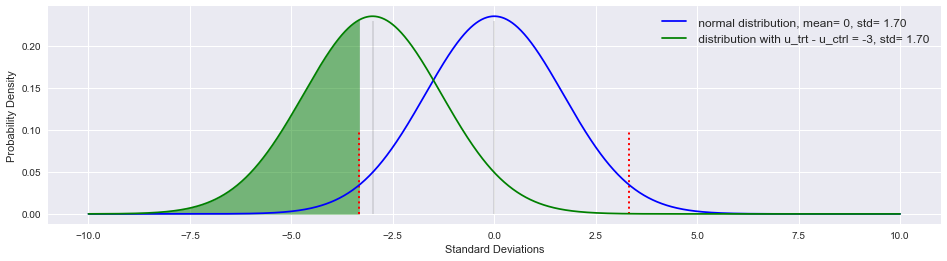

In [69]:
# example 7.31, 7.32, 7.33, 7.34, 7.35
n = 100
s = 12
se = np.sqrt( (s**2/n) + (s**2/n ) )
mean_null = 0
mean_practical = -3
z = z95
me = [se*z95, (se*z95)*(-1)]
means = [mean_null,mean_practical]

fig = plt.figure(figsize=(16,4))
x = np.linspace(-10, 10, 1500)
ax = fig.add_subplot(1,1,1)
y = stats.norm(mean_null, se).pdf(x)
ax.plot(x, y, color='blue',label=f' normal distribution, mean= {mean_null}, std= {se:.2f}'.format(mean=mean_null))

y = stats.norm(mean_practical, se).pdf(x)
ax.plot(x, y, color='green',label=f' distribution with u_trt - u_ctrl = {mean_practical}, std= {se:.2f}'.format(mean=mean_null))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('')
ax.vlines(x=me, ymin=0, ymax=0.1, colors='red', lw=2,linestyles="dotted")
ax.vlines(x=means, ymin=0, ymax=0.23, colors='black', lw=2,alpha=0.1)
legend = ax.legend(shadow=True,fontsize='large')
ax.fill_between(x, y, color='green', alpha=0.5, where = (x<min(me)))
power = stats.norm(mean_practical, se).cdf(x=min(me))
print("statistical power is:",power)

0.42377983040946099

statistical power is: 0.976860902426


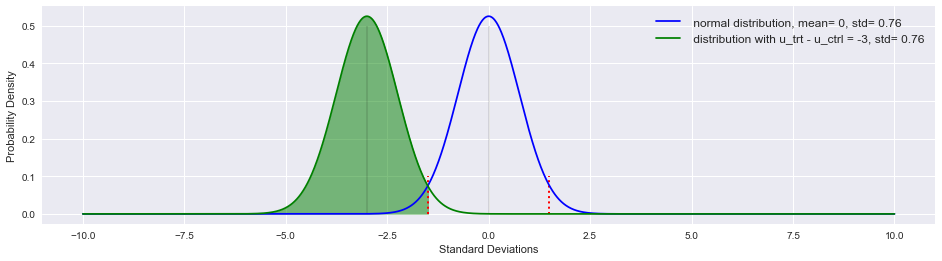

In [74]:
n = 500
s = 12
se = np.sqrt( (s**2/n) + (s**2/n ) )
mean_null = 0
mean_practical = -3
z = z95
me = [se*z95, (se*z95)*(-1)]
means = [mean_null,mean_practical]

fig = plt.figure(figsize=(16,4))
x = np.linspace(-10, 10, 1500)
ax = fig.add_subplot(1,1,1)
y = stats.norm(mean_null, se).pdf(x)
ax.plot(x, y, color='blue',label=f' normal distribution, mean= {mean_null}, std= {se:.2f}'.format(mean=mean_null))

y = stats.norm(mean_practical, se).pdf(x)
ax.plot(x, y, color='green',label=f' distribution with u_trt - u_ctrl = {mean_practical}, std= {se:.2f}'.format(mean=mean_null))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('')
ax.vlines(x=me, ymin=0, ymax=0.1, colors='red', lw=2,linestyles="dotted")
ax.vlines(x=means, ymin=0, ymax=0.5, colors='black', lw=2,alpha=0.1)
legend = ax.legend(shadow=True,fontsize='large')
ax.fill_between(x, y, color='green', alpha=0.5, where = (x<min(me)))
power = stats.norm(mean_practical, se).cdf(x=min(me))
print("statistical power is:",power)

In [109]:
#
'''What sample size will lead to a power of 80%? Use significance = 0.05'''
n = 'unknown'
s = 12 # population standard deviation
# se = np.sqrt((s**2/n)+(s**2/n)) se formula
z_alt = stats.norm.ppf(.80) # the corresponding z* for p-value of .80 in a standard normal distribution
sl = .05 # for a .05 significance, the rejection area z* would be about 1.96 for a standard normal distribution
rej = stats.norm.cdf(z95)
reach = z95 + z_alt # this times standard error equals -3
# 3 = reach * np.sqrt((s**2/n)+(s**2/n))
# 3**2 = (reach**2) * (s**2/n)+(s**2/n)
# 3**2 = (reach**2) * ((s**2+s**2) / n)
n = ((reach**2)/3**2 )*(s**2+s**2)
print("we should target", f'{n:.2f}',"patients to achieve 80% power at the 0.05 significance level for this context")

we should target 251.17 patients to achieve 80% power at the 0.05 significance level for this context


In [156]:
'''
7.33 Increasing corn yield. A large farm wants to try out a new type of fertilizer to evaluate whether
it will improve the farm's corn production. The land is broken into plots that produce an average of 1,215
pounds of corn with a standard deviation of 94 pounds per plot. The owner is interested in detecting any
average difference of at least 40 pounds per plot. How many plots of land would be needed for the experiment
if the desired power level is 90%? Use significance = 0.05. Assume each plot of land gets treated with either the
current fertilizer or the new fertilizer.
'''
mean_null = 0
mean_practical = 40
s = 94
power = .9
sl = .05
z = z95

z_alt = stats.norm.ppf(power)
rej = stats.norm.cdf(z)
reach = z + z_alt 
n = ((reach**2)/mean_practical**2 )*(s**2+s**2)
print("they should target", f'{n:.2f}',f"plots of land to achieve {power:.0%} power at the {sl:.2f} significance level for this context")

they should target 116.06 plots of land to achieve 90% power at the 0.05 significance level for this context


In [155]:
'''7.34 Email outreach efforts. A medical research group is recruiting people to complete short surveys
about their medical history. For example, one survey asks for information on a person's family history in
regards to cancer. Another survey asks about what topics were discussed during the person's last visit to a
hospital. So far, as people sign up, they complete an average of just 4 surveys, and the standard deviation
of the number of surveys is about 2.2. The research group wants to try a new interface that they think will
encourage new enrollees to complete more surveys, where they will randomize each enrollee to either get the
new interface or the current interface. How many new enrollees do they need for each interface to detect an
effect size of 0.5 surveys per enrollee, if the desired power level is 80%? Use significance = 0.05.'''

mean_null = 0
mean_practical = .5
s = 2.2
power = .8
sl = .05
z = z95

z_alt = stats.norm.ppf(power)
rej = stats.norm.cdf(z)
reach = z + z_alt 
n = ((reach**2)/mean_practical**2 )*(s**2+s**2)
print("they should target", f'{n:.2f}',f"enrollees to achieve {power:.0%} power at the {sl:.2f} significance level for this context")

they should target 303.92 enrollees to achieve 80% power at the 0.05 significance level for this context
